# Simulation of a classical moving harmonic potential
## Introduction
In this notebook, we simulate a particle trapped in an harmonic potential. The potential profile is originally centered in $x=x_0$ and then moves to position $x_1$ with a constant velocity $v$ during the time range $[t_0,t_1]$. Then, the potential stops moving and we observe the oscillations.

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Theory
We begin by setting some parameters common for all calculations. Then we enter the analytical results to see if Python agrees
### Parameters

In [2]:
x0, x1, t, t0, t1, m, v, w = symbols('x_0 x_1 t t_0 t_1 m v omega', positive=True)

B = -v/w
C = -v/w*sin(w*(t1-t0))
D = v/w * (1-cos(w*(t1-t0)))

def get_Ec(x):
    dxdt = diff(x, t)
    return Rational(1, 2) * m * dxdt**2

def get_V(x, q):
    return Rational(1, 2) * m * w**2 * (x-q)**2

### Movement of potential
Position and speed for $t_0 \leqslant t \leqslant t_1$:

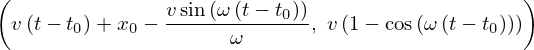

In [3]:
q = x0 + v*(t-t0)
x = x0 + v*(t-t0) + B*sin(w*(t-t0))
dxdt = simplify(diff(x, t))
x, dxdt

Potential and kinetic energy for $t_0 \leqslant t \leqslant t_1$:

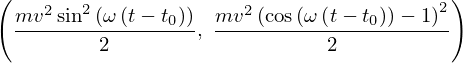

In [4]:
V_01 = get_V(x, q)
Ec_01 = simplify(get_Ec(x))
V_01, Ec_01

Total energy for $t_0 \leqslant t \leqslant t_1$:

In [5]:
E_01 = simplify(Ec_01 + V_01)
E_01

### Potential finished moving
Position and speed for $t_1 < t$:

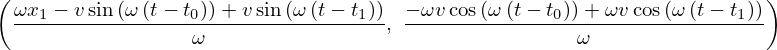

In [6]:
q = x1
x = x1 + C*cos(w*(t-t1)) + D*sin(w*(t-t1))
x = simplify(x)
dxdt = diff(x, t)
x, dxdt

In [7]:
x_bis = x1 + 2*v/w*cos(w*(t-(t0+t1)/2))*sin(w*(t0-t1)/2)
trigsimp(x-x_bis)

In [8]:
dxdt_bis = -2*v*sin(w*(t-(t0+t1)/2))*sin(w*(t0-t1)/2)
trigsimp(dxdt-dxdt_bis)

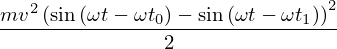

In [9]:
V_1 = factor(get_V(x, q))
V_1_theo = 2*m*v**2 * sin(w*(t-(t0+t1)/2))**2 * sin(w*(t0-t1)/2)**2
# V_1, trigsimp(get_V(x_bis, q) - V_1_theo)
# trigsimp(V_1)
# trigsimp(get_V(x_bis, q))
V_1

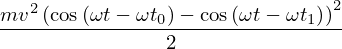

In [10]:
Ec_1 = factor(get_Ec(x))
Ec_1

In [11]:
E_1 = simplify(Ec_1 + V_1)
E_1

## Simulation
### Parameters

Below are the parameters of the potential and of the particle used

In [2]:
m = 0.0011
# omega = 2*np.pi/10
omega = 1.5193
T = 2*np.pi/omega
T

Here we define the trajectory

In [22]:
x0 = 0
x1 = 25
t0 = 10
t1 = t0 + 5*T/2
v = (x1-x0)/(t1-t0)

Finally, we define the simulation ranges

In [ ]:
x_start = -25
x_end = 50

t_start = 0
t_end = 100

dx = 0.1
dt = 0.1

### Trajectory
Round t1 and t0 to a precision of dt

In [ ]:
def round_to(f, d):
    return round(f) + round((f-round(f)) / d) * d
t0 = round_to(t0, dt)
t1 = round_to(t1, dt)
t0, t1

Define the time arrays for each phase of the movement

In [ ]:
t = np.arange(t_start, t_end, dt)
start_t0 = np.arange(t_start, t0, dt)
t0_t1 = np.arange(t0, t1, dt)
t1_end = np.arange(t1, t_end, dt)

q = np.concatenate((x0 * np.ones(len(start_t0)), v*(t0_t1-t0), x1 * np.ones(len(t1_end))))

A = 0
B = -v/omega

C = -v/omega * np.sin(omega*(t1-t0))
D = v/omega*(1-np.cos(omega*(t1-t0)))

x_start_t0 = x0 * np.ones(len(start_t0))
x_t0_t1 = x0 + v*(t0_t1-t0) + B*np.sin(omega*(t0_t1-t0))
x_t1_end = x1 + C*np.cos(omega*(t1_end-t1)) + D*np.sin(omega*(t1_end-t1))

x = np.concatenate((x_start_t0, x_t0_t1, x_t1_end))
min_x, max_x = min(x), max(x)

In [ ]:
position_fig = plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, t, label="$x(t)$")
plt.plot([min_x, max_x], [t0, t0], '--', label='$t_0$')
plt.plot([min_x, max_x], [t1, t1], '--', label='$t_1$')
plt.xlabel("Position")
plt.ylabel("Time")
plt.legend(loc="upper left")

### Energy from simulation

In [ ]:
speed = np.concatenate((
    np.zeros(len(start_t0)), 
    v-v*np.cos(omega*(t0_t1-t0)), 
    -C*omega*np.sin(omega*(t1_end-t1)) + D*omega*np.cos(omega*(t1_end-t1))
))

Ec = 1/2 * m * speed**2
V = 1/2*m*omega**2 * (x-q)**2
E = Ec + V

energy_fig = plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, Ec*1e3, label='Ec')
plt.plot(t, V*1e3, label='V')
plt.plot(t, E*1e3, label='E')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy")
E[-1]*1e3

### Theoretical energy

In [ ]:
Ec = np.concatenate((
    np.zeros(len(start_t0)), 
    1/2*m*v**2 * (1 - np.cos(omega*(t0_t1-t0)))**2, 
    2*m*v**2 * np.sin(omega*(t1_end-(t0+t1)/2))**2 * sin(omega*(t0-t1)/2)**2
))

V = np.concatenate((
    np.zeros(len(start_t0)), 
    1/2*m*v**2 * np.sin(omega*(t0_t1-t0))**2, 
    2*m*v**2 * np.cos(omega*(t1_end-(t0+t1)/2))**2 * sin(omega*(t0-t1)/2)**2
))

E = np.concatenate((
    np.zeros(len(start_t0)), 
    m*v**2 * (1 - np.cos(omega*(t0_t1-t0))), 
    m*v**2 * (1-np.cos(omega*(t1-t0))) * np.ones(len(t1_end))
))

energy_theo_fig = plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, Ec*1e3, label='Ec')
plt.plot(t, V*1e3, label='V')
plt.plot(t, E*1e3, label='E')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy")
E[-1]*1e3

In [4]:
## Animation

### Trajectory
Round t1 and t0 to a precision of dt

In [23]:
def round_to(f, d):
    return round(f) + round((f-round(f)) / d) * d
t0 = round_to(t0, dt)
t1 = round_to(t1, dt)
t0, t1

Define the time arrays for each phase of the movement

In [24]:
t = np.arange(t_start, t_end, dt)
start_t0 = np.arange(t_start, t0, dt)
t0_t1 = np.arange(t0, t1, dt)
t1_end = np.arange(t1, t_end, dt)

q = np.concatenate((x0 * np.ones(len(start_t0)), v*(t0_t1-t0), x1 * np.ones(len(t1_end))))

A = 0
B = -v/omega

C = -v/omega * np.sin(omega*(t1-t0))
D = v/omega*(1-np.cos(omega*(t1-t0)))

x_start_t0 = x0 * np.ones(len(start_t0))
x_t0_t1 = x0 + v*(t0_t1-t0) + B*np.sin(omega*(t0_t1-t0))
x_t1_end = x1 + C*np.cos(omega*(t1_end-t1)) + D*np.sin(omega*(t1_end-t1))

x = np.concatenate((x_start_t0, x_t0_t1, x_t1_end))
min_x, max_x = min(x), max(x)

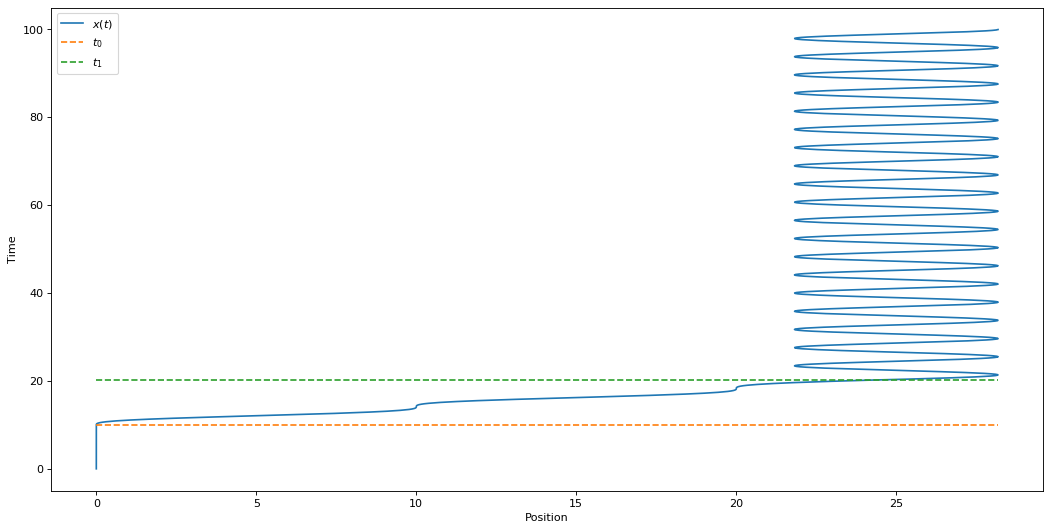

In [25]:
position_fig = plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, t, label="$x(t)$")
plt.plot([min_x, max_x], [t0, t0], '--', label='$t_0$')
plt.plot([min_x, max_x], [t1, t1], '--', label='$t_1$')
plt.xlabel("Position")
plt.ylabel("Time")
plt.legend(loc="upper left")

### Energy from simulation

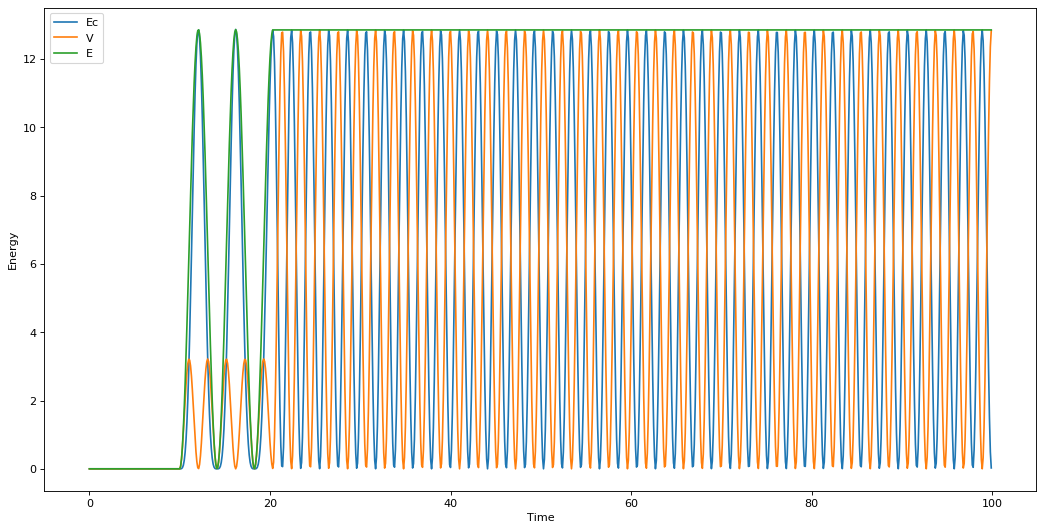

In [26]:
speed = np.concatenate((
    np.zeros(len(start_t0)), 
    v-v*np.cos(omega*(t0_t1-t0)), 
    -C*omega*np.sin(omega*(t1_end-t1)) + D*omega*np.cos(omega*(t1_end-t1))
))

Ec = 1/2 * m * speed**2
V = 1/2*m*omega**2 * (x-q)**2
E = Ec + V

energy_fig = plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, Ec*1e3, label='Ec')
plt.plot(t, V*1e3, label='V')
plt.plot(t, E*1e3, label='E')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy")
E[-1]*1e3

### Theoretical energy

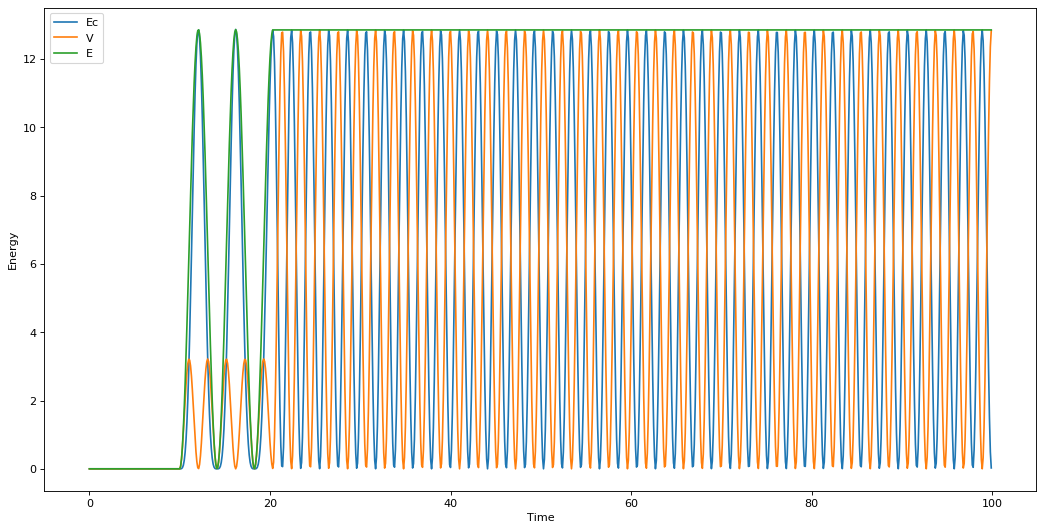

In [27]:
Ec = np.concatenate((
    np.zeros(len(start_t0)), 
    1/2*m*v**2 * (1 - np.cos(omega*(t0_t1-t0)))**2, 
    2*m*v**2 * np.sin(omega*(t1_end-(t0+t1)/2))**2 * sin(omega*(t0-t1)/2)**2
))

V = np.concatenate((
    np.zeros(len(start_t0)), 
    1/2*m*v**2 * np.sin(omega*(t0_t1-t0))**2, 
    2*m*v**2 * np.cos(omega*(t1_end-(t0+t1)/2))**2 * sin(omega*(t0-t1)/2)**2
))

E = np.concatenate((
    np.zeros(len(start_t0)), 
    m*v**2 * (1 - np.cos(omega*(t0_t1-t0))), 
    m*v**2 * (1-np.cos(omega*(t1-t0))) * np.ones(len(t1_end))
))

energy_theo_fig = plt.figure(figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, Ec*1e3, label='Ec')
plt.plot(t, V*1e3, label='V')
plt.plot(t, E*1e3, label='E')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy")
E[-1]*1e3
